# Lab01 Report

#### st122314 - Win Win Phyo

## 1. Introduction

AlexNet which was proposed in the research work of Alex Krizhevsky, is one of the popular variants of the convolutional neural network and used as a deep learning framework.In this lab, the AlexNet model was provided by the PyTorch as a transfer learning framework with pre-trained ImageNet weights. The network will be trained on the CIFAR-10 dataset for a multi-class image classification problem.

### 1.1 Implementation of AlexNet in PyTorch

In a first place,the most important libraries are imported. Remaining libraries will be imported along with the code segments. 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

Using the below code snippet, the input image will be first converted to the size 256×256 pixels and then cropped to the size 224×224 pixels as the AlexNet model require the input images with size 224×224. Finally, the image dataset will be converted to the PyTorch tensor data type. To normalize the input image data set, the mean and standard deviation of the pixels data is used as per the standard values suggested by the PyTorch.

In [2]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In the below code segment, the CIFAR10 dataset is downloaded from the PyTorch’s dataset library and parallelly transformed into the required shape using the transform method defined above. 

In [3]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

Files already downloaded and verified
Files already downloaded and verified


Once the dataset is downloaded, some random images will be visualized from the dataset using the below function.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


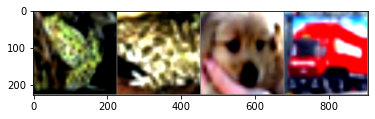

 Frog  Frog   Dog Truck


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 2. Method

After confirming the downloaded image dataset, the AlexNet model will be pre-trained on the ImageNet dataset. 

In [5]:
#Download pretrained Alexnext Model
model = torch.hub.load('pytorch/vision:v0.5.0', 'alexnet', pretrained=True)

Using cache found in /home/st122314/.cache/torch/hub/pytorch_vision_v0.5.0


In [6]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In this lab, AlexNet model was implemented on the CIFAR-10 dataset. It is necessary to transform the last layer of the model to be applicable to a 10-class classification problem since the original AlexNet is a 1000-class classifier. According to the model architecture employed in this lab, not only the last layer of AlexNet was altered, but also the first and the fourth layers of the classifer were altered and they are in the below cell segment.

In [7]:
import torch.nn as nn
model.classifier[1] = nn.Linear(9216,4096)
model.classifier[4] = nn.Linear(4096,1024)
model.classifier[6] = nn.Linear(1024,10)

In [8]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In the above description, the last to classifiers are updated and 10 nodes are formed as the output features. And then, to speed-up the performance during training, the CUDA interface with GPU will be used.

In [9]:
# move the input and model to GPU for speed if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
print(device)


cuda:0


In [11]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Apart from the alteration of the model architechture, there are some parameters which play an important role in the model performance such as parameters for the loss and optimizer functions as well as the type of these functions themselves. The followings are the parameters that are used in this lab:

loss function (refered to as criterion in this lab): cross entropy loss

optimizer = stocastic gradient descent with the learning rate of 0.001

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In the next step, the AlexNet model will be trained.

In [13]:
import time

for epoch in range(7):  # loop over the dataset multiple times

    running_loss = 0.0
    start_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        #Time
        end_time = time.time()
        time_taken = end_time - start_time

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            print('Time:',time_taken)
            running_loss = 0.0

print('Finished Training of AlexNet')

[1,  2000] loss: 1.209
Time: 31.762187004089355
[1,  4000] loss: 0.900
Time: 63.10801959037781
[1,  6000] loss: 0.804
Time: 95.0675311088562
[1,  8000] loss: 0.747
Time: 127.44201493263245
[1, 10000] loss: 0.686
Time: 158.4861810207367
[1, 12000] loss: 0.671
Time: 189.9185483455658
[2,  2000] loss: 0.520
Time: 31.267547130584717
[2,  4000] loss: 0.488
Time: 62.271785259246826
[2,  6000] loss: 0.521
Time: 93.70050930976868
[2,  8000] loss: 0.521
Time: 126.60760688781738
[2, 10000] loss: 0.483
Time: 159.25156784057617
[2, 12000] loss: 0.492
Time: 191.7435507774353
[3,  2000] loss: 0.329
Time: 35.78943610191345
[3,  4000] loss: 0.350
Time: 73.87479877471924
[3,  6000] loss: 0.359
Time: 107.88682889938354
[3,  8000] loss: 0.362
Time: 140.0730459690094
[3, 10000] loss: 0.370
Time: 172.84684491157532
[3, 12000] loss: 0.376
Time: 205.95295667648315
[4,  2000] loss: 0.217
Time: 33.700265407562256
[4,  4000] loss: 0.246
Time: 66.95244908332825
[4,  6000] loss: 0.272
Time: 100.12855195999146
[4,

Once the training is over, the classification accuracy of the trained model will be tested on 10,000 test images.

## Results

In [14]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 84.98 %


The model has given 84.39 % of accuracy in classifying images. 

In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Airplane : 84 %
Accuracy of   Car : 93 %
Accuracy of  Bird : 76 %
Accuracy of   Cat : 79 %
Accuracy of  Deer : 85 %
Accuracy of   Dog : 71 %
Accuracy of  Frog : 90 %
Accuracy of Horse : 87 %
Accuracy of  Ship : 92 %
Accuracy of Truck : 87 %


Then, the classification accuracy will be checked in classifying images of the individual classes.

In the end, we will match the average accuracy in classifying images of individual classes with the accuracy of the entire network.

In [16]:
#Verifying average accuracy of the network
avg = 0
for i in range(10):
    temp = (100 * class_correct[i] / class_total[i])
    avg = avg + temp
avg = avg/10
print('Average accuracy = ', avg)  

Average accuracy =  84.98


The average accuracy will be tested in classifying images of individual classes with the accuracy of the entire network and got 84.98%

## Conclusions

From this lab learning, I got not only a deeper understanding of the AlexNet model but also how to implement pretrained models as wellas how to alter the model architecture according to specific problems. Then, I aslo leant what docker is, and how to use it. As for the next step, I may want to try out the advance network like ResNet,ResNeXt, GoogLeNet, etc.